In [1]:
import os
os.chdir("/home/yaroslav/FCUL/MARS_1.0")

In [ ]:
import ijson
import json
import duckdb
from project_cda.walker import Walker, RandomCrowd, RandomWalkerSettings, GraphLoader
import numpy as np
from collections import Counter

In [ ]:
users_dict = 'data/helpers/user_dict_filtered.json'

EXPERIMENT_SIGNATURE = "Jac005_Full_Leiden_mod"

DATA_DIR = "data"
GRAPH_DIR = os.path.join(os.path.join(DATA_DIR, "graphs"), EXPERIMENT_SIGNATURE)
REPORTS_DIR = os.path.join(os.path.join(DATA_DIR, "reports"), EXPERIMENT_SIGNATURE)

In [4]:
users_table = duckdb.query("""CREATE OR REPLACE TABLE users AS SELECT * FROM read_csv_auto('data/datasets/anime_azathoth42/users_sterilized.csv')""")

In [5]:
def fetch_secondary_user_data(username):
    return duckdb.execute(f"""
                          SELECT birth_date, country, gender, join_date, stats_mean_score
                          FROM users WHERE username = ?""", [username]).fetchall()[0]

In [ ]:
with open(users_dict, 'rb') as uf:
    parser = ijson.kvitems(uf, "")
    t = 0
    users = []
    for username, animelist in parser:
        w = Walker(username, animelist)
        users.append(w)
        t += 1
        if t > 0:
            break

graph_loader = GraphLoader(base_folder=GRAPH_DIR)
random_crowd_settings = RandomWalkerSettings(
    strategy = 'probabilistic',
    prob_decay=2.0,
    top_k=50
    )


random_crowd = RandomCrowd(
    users=users,
    n_walkers_per_user=20,
    settings=random_crowd_settings
    )

random_crowd.run()
random_crowd.evaluate()


[00:26:07] [DEBUG] [WALKER] choujikun10 Walker is initializing
[00:26:07] [DEBUG] [WALKER] choujikun10 Trail builded
[00:26:07] [DEBUG] [WALKER] choujikun10 Cheating factor calculated
[00:26:07] [DEBUG] [WALKER] choujikun10 Walker initialized. Start year: 2013. Start node: 20
[00:26:07] [INFO] [CROWD] Random Crowd initialized
[00:26:07] [DEBUG] [RW_INIT] choujikun10_001 Random Walker initialized.
[00:26:07] [DEBUG] [RW_INIT] choujikun10_002 Random Walker initialized.
[00:26:07] [DEBUG] [RW_INIT] choujikun10_003 Random Walker initialized.
[00:26:07] [DEBUG] [RW_INIT] choujikun10_004 Random Walker initialized.
[00:26:07] [DEBUG] [RW_INIT] choujikun10_005 Random Walker initialized.
[00:26:07] [DEBUG] [RW_INIT] choujikun10_006 Random Walker initialized.
[00:26:07] [DEBUG] [RW_INIT] choujikun10_007 Random Walker initialized.
[00:26:07] [DEBUG] [RW_INIT] choujikun10_008 Random Walker initialized.
[00:26:07] [DEBUG] [RW_INIT] choujikun10_009 Random Walker initialized.
[00:26:07] [DEBUG] [RW_I

[00:26:07] [WARNING] [LOADER] Graph for year 2013 not found.
[00:26:07] [INFO] [CROWD] Processing year 2014...
[00:26:07] [WARNING] [LOADER] Graph for year 2014 not found.
[00:26:07] [INFO] [CROWD] Processing year 2015...
[00:26:07] [WARNING] [LOADER] Graph for year 2015 not found.
[00:26:07] [INFO] [CROWD] Processing year 2016...
[00:26:07] [WARNING] [LOADER] Graph for year 2016 not found.
[00:26:07] [INFO] [CROWD] Processing year 2017...
[00:26:07] [WARNING] [LOADER] Graph for year 2017 not found.
[00:26:07] [INFO] [CROWD] Processing year 2018...
[00:26:07] [WARNING] [LOADER] Graph for year 2018 not found.
[00:26:07] [INFO] [CROWD] All walks are stopped.


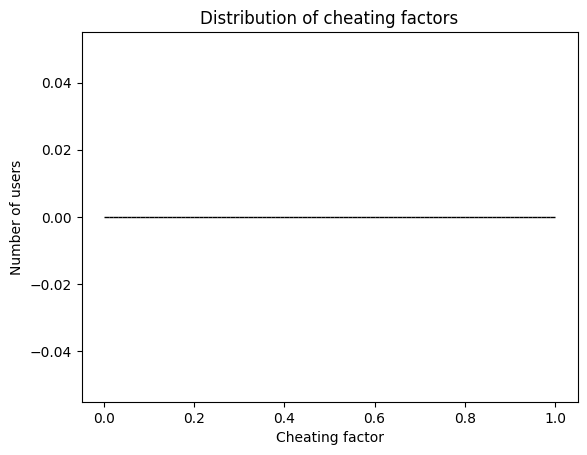

In [7]:
import matplotlib.pyplot as plt

plt.hist(history, bins=100, color='skyblue', edgecolor='black')
plt.xlabel("Cheating factor")
plt.ylabel("Number of users")
plt.title("Distribution of cheating factors")
plt.show()
